# Facial Expression Recognition - Genuine Challenge

## Introduction
This project aims to classify the emotion on a person's face into one of seven categories, using deep convolutional neural networks. The model will be trained on the **FER-2013** dataset which was published on International Conference on Machine Learning (ICML).

## Libraries & Tools
In this notebook we will be using computer vision & deep learning tools such as OpenCV/Tensorflow/Keras API to detect and classify human emotions.


In [1]:
import cv2
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

print('OpenCV2 version: ', cv2.__version__)
print('TensorFlow version: ', tf.__version__)
print('matplotlib version:', matplotlib.__version__)
print('numpy version:', np.__version__)

OpenCV2 version:  4.5.1
TensorFlow version:  2.4.1
matplotlib version: 3.3.2
numpy version: 1.19.2


## Data Sourcing

**FER-2013** https://www.kaggle.com/msambare/fer2013

The model will be based on **FER-2013** dataset which was published on ICML. This dataset contains 35,685 examples of 48x48 pixel gray scale images of faces divided into train and test dataset. Images are categorized based on the emotion shown in the facial expressions (happiness, neutral, sadness, anger, surprise, disgust, fear).

### Importing Dataset & Preprocessing

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = './src/data/train/'
test_dir = './src/data/test/'

row, col = 48, 48
classes = 7

def count_exp(path, set_):
    dict_ = {}
    for expression in os.listdir(path):
        dir_ = path + expression
        dict_[expression] = len(os.listdir(dir_))
    df = pd.DataFrame(dict_, index=[set_])
    return df

train_count = count_exp(train_dir, 'train')
test_count = count_exp(test_dir, 'test')

print('Training set:')
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.3,
                                   horizontal_flip=True)
training_set = train_datagen.flow_from_directory(train_dir,
                                                batch_size=64,
                                                target_size=(48,48),
                                                shuffle=True,
                                                color_mode='grayscale',
                                                class_mode='categorical')
print(train_count)

print('_________________________________________________________________')

print('Testing set:')
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(test_dir,
                                                batch_size=64,
                                                target_size=(48,48),
                                                shuffle=True,
                                                color_mode='grayscale',
                                                class_mode='categorical')
print(test_count)

Training set:
Found 28709 images belonging to 7 classes.
       angry  disgusted  fearful  happy  neutral   sad  surprised
train   3995        436     4097   7215     4965  4830       3171
_________________________________________________________________
Testing set:
Found 7178 images belonging to 7 classes.
      angry  disgusted  fearful  happy  neutral   sad  surprised
test    958        111     1024   1774     1233  1247        831


### Plot of number of images in training and test set

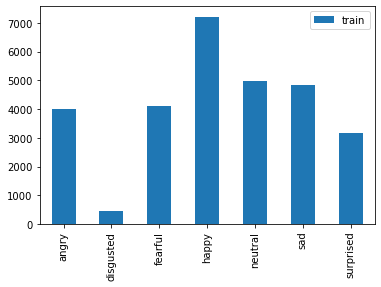

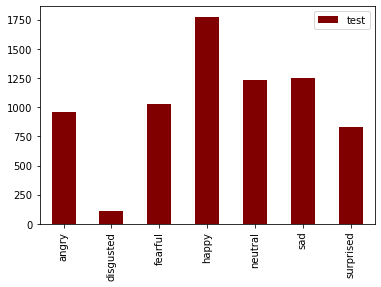

In [3]:
train_count.transpose().plot(kind='bar')
test_count.transpose().plot(kind='bar', color='maroon')
plt.show()

### Dataset sample per category


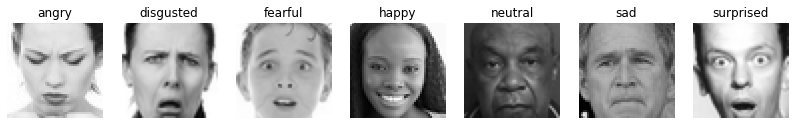

In [4]:
from tensorflow.keras.preprocessing.image import load_img

plt.figure(figsize=(14,22))
i = 1
for expression in os.listdir(train_dir):
    img = load_img((train_dir + expression +'/'+ os.listdir(train_dir + expression)[5]))
    plt.subplot(1,7,i)
    plt.imshow(img)
    plt.title(expression)
    plt.axis('off')
    i += 1
plt.show()

As we can see each sample represents the facial expression of the corresponding labels.

### Dataset Preparation

In [3]:
from PIL import Image
from tqdm import tqdm
import os

# convert string to integer
def atoi(s):
    n = 0
    for i in s:
        n = n*10 + ord(i) - ord("0")
    return n

# making folders
outer_names = ['test','train']
inner_names = ['angry', 'disgusted', 'fearful', 'happy', 'sad', 'surprised', 'neutral']
os.makedirs('data', exist_ok=True)
for outer_name in outer_names:
    os.makedirs(os.path.join('data',outer_name), exist_ok=True)
    for inner_name in inner_names:
        os.makedirs(os.path.join('data',outer_name,inner_name), exist_ok=True)

# to keep count of each category
angry = 0
disgusted = 0
fearful = 0
happy = 0
sad = 0
surprised = 0
neutral = 0
angry_test = 0
disgusted_test = 0
fearful_test = 0
happy_test = 0
sad_test = 0
surprised_test = 0
neutral_test = 0

df = pd.read_csv('./fer2013.csv')
mat = np.zeros((48,48),dtype=np.uint8)
print("Saving images...")

# read the csv file line by line
for i in tqdm(range(len(df))):
    txt = df['pixels'][i]
    words = txt.split()
    
    # the image size is 48x48
    for j in range(2304):
        xind = j // 48
        yind = j % 48
        mat[xind][yind] = atoi(words[j])

    img = Image.fromarray(mat)

    # train
    if i < 28709:
        if df['emotion'][i] == 0:
            img.save('train/angry/im'+str(angry)+'.png')
            angry += 1
        elif df['emotion'][i] == 1:
            img.save('train/disgusted/im'+str(disgusted)+'.png')
            disgusted += 1
        elif df['emotion'][i] == 2:
            img.save('train/fearful/im'+str(fearful)+'.png')
            fearful += 1
        elif df['emotion'][i] == 3:
            img.save('train/happy/im'+str(happy)+'.png')
            happy += 1
        elif df['emotion'][i] == 4:
            img.save('train/sad/im'+str(sad)+'.png')
            sad += 1
        elif df['emotion'][i] == 5:
            img.save('train/surprised/im'+str(surprised)+'.png')
            surprised += 1
        elif df['emotion'][i] == 6:
            img.save('train/neutral/im'+str(neutral)+'.png')
            neutral += 1

    # test
    else:
        if df['emotion'][i] == 0:
            img.save('test/angry/im'+str(angry_test)+'.png')
            angry_test += 1
        elif df['emotion'][i] == 1:
            img.save('test/disgusted/im'+str(disgusted_test)+'.png')
            disgusted_test += 1
        elif df['emotion'][i] == 2:
            img.save('test/fearful/im'+str(fearful_test)+'.png')
            fearful_test += 1
        elif df['emotion'][i] == 3:
            img.save('test/happy/im'+str(happy_test)+'.png')
            happy_test += 1
        elif df['emotion'][i] == 4:
            img.save('test/sad/im'+str(sad_test)+'.png')
            sad_test += 1
        elif df['emotion'][i] == 5:
            img.save('test/surprised/im'+str(surprised_test)+'.png')
            surprised_test += 1
        elif df['emotion'][i] == 6:
            img.save('test/neutral/im'+str(neutral_test)+'.png')
            neutral_test += 1

print("Done!")

FileNotFoundError: [Errno 2] No such file or directory: './fer2013.csv'